# Covering Spaces: Theory and Visualization

## 1. Introduction

Covering spaces are fundamental objects in algebraic topology that provide a powerful tool for studying the structure of topological spaces. They establish deep connections between topology, group theory, and geometry, serving as the geometric manifestation of subgroups of the fundamental group.

### Definition

Let $X$ be a topological space. A **covering space** of $X$ is a pair $(\tilde{X}, p)$ where $\tilde{X}$ is a topological space and $p: \tilde{X} \to X$ is a continuous surjective map (called the **covering map** or **projection**) satisfying the following condition:

> For every point $x \in X$, there exists an open neighborhood $U$ of $x$ such that $p^{-1}(U)$ is a disjoint union of open sets in $\tilde{X}$, each of which is mapped homeomorphically onto $U$ by $p$.

Formally, if we write:
$$p^{-1}(U) = \bigsqcup_{\alpha \in A} V_\alpha$$
then $p|_{V_\alpha}: V_\alpha \to U$ is a homeomorphism for each $\alpha \in A$.

The neighborhood $U$ is called an **evenly covered neighborhood**, and the sets $V_\alpha$ are called **sheets** of the covering over $U$.

### The Degree of a Covering

If $X$ is connected, then the cardinality of each fiber $p^{-1}(x)$ is constant for all $x \in X$. This number is called the **degree** or **multiplicity** of the covering:
$$\deg(p) = |p^{-1}(x)| \quad \text{for any } x \in X$$

When $\deg(p) = n < \infty$, we call $p$ an **n-fold covering** or **n-sheeted covering**.

## 2. Classical Examples

### Example 1: The Real Line Covering the Circle

The most fundamental example is the exponential map $p: \mathbb{R} \to S^1$ defined by:
$$p(t) = e^{2\pi i t} = (\cos(2\pi t), \sin(2\pi t))$$

This is the **universal covering** of the circle. The fiber over any point $z \in S^1$ is:
$$p^{-1}(z) = \{t + n : n \in \mathbb{Z}\}$$
where $p(t) = z$.

### Example 2: n-fold Covering of the Circle

The map $p_n: S^1 \to S^1$ defined by:
$$p_n(z) = z^n$$
is an $n$-fold covering of the circle by itself. In terms of angles:
$$p_n(e^{i\theta}) = e^{in\theta}$$

### Example 3: Covering of the Torus

The plane $\mathbb{R}^2$ covers the torus $T^2 = S^1 \times S^1$ via:
$$p(x, y) = (e^{2\pi i x}, e^{2\pi i y})$$

The fundamental domain is the unit square $[0,1] \times [0,1]$.

## 3. Lifting Properties

One of the most powerful aspects of covering spaces is their **lifting properties**.

### Path Lifting Lemma

Let $p: \tilde{X} \to X$ be a covering map, $\gamma: [0,1] \to X$ a path in $X$, and $\tilde{x}_0 \in \tilde{X}$ with $p(\tilde{x}_0) = \gamma(0)$. Then there exists a **unique** path $\tilde{\gamma}: [0,1] \to \tilde{X}$ such that:
1. $\tilde{\gamma}(0) = \tilde{x}_0$
2. $p \circ \tilde{\gamma} = \gamma$

The path $\tilde{\gamma}$ is called the **lift** of $\gamma$ starting at $\tilde{x}_0$.

### Homotopy Lifting Property

If $H: [0,1] \times [0,1] \to X$ is a homotopy of paths and $\tilde{\gamma}_0$ is a lift of $H(\cdot, 0)$, then there exists a unique homotopy $\tilde{H}: [0,1] \times [0,1] \to \tilde{X}$ lifting $H$ with $\tilde{H}(\cdot, 0) = \tilde{\gamma}_0$.

### Monodromy Action

The fundamental group $\pi_1(X, x_0)$ acts on the fiber $p^{-1}(x_0)$ via the **monodromy action**:
$$[\gamma] \cdot \tilde{x}_0 = \tilde{\gamma}(1)$$
where $\tilde{\gamma}$ is the lift of $\gamma$ starting at $\tilde{x}_0$.

## 4. Connection to the Fundamental Group

### The Fundamental Theorem of Covering Spaces

Let $X$ be a path-connected, locally path-connected, and semi-locally simply connected space. Then:

1. **Existence of Universal Cover:** There exists a simply connected covering space $\tilde{X}$ (the **universal cover**).

2. **Classification:** There is a bijective correspondence:
$$\left\{\begin{array}{c}\text{Covering spaces of } X \\ \text{(up to isomorphism)}\end{array}\right\} \longleftrightarrow \left\{\begin{array}{c}\text{Subgroups of } \pi_1(X, x_0) \\ \text{(up to conjugacy)}\end{array}\right\}$$

3. **Index Formula:** If $(\tilde{X}, p)$ corresponds to subgroup $H \leq \pi_1(X, x_0)$, then:
$$\deg(p) = [\pi_1(X, x_0) : H]$$

### Induced Homomorphism

The covering map $p: \tilde{X} \to X$ induces an injective homomorphism:
$$p_*: \pi_1(\tilde{X}, \tilde{x}_0) \hookrightarrow \pi_1(X, x_0)$$

The image $p_*(\pi_1(\tilde{X}, \tilde{x}_0))$ is precisely the subgroup $H$ corresponding to the covering.

## 5. Deck Transformations

A **deck transformation** (or **covering transformation**) is a homeomorphism $\phi: \tilde{X} \to \tilde{X}$ such that $p \circ \phi = p$.

The set of all deck transformations forms a group under composition, denoted $\text{Deck}(\tilde{X}/X)$ or $\text{Aut}(p)$.

### Properties

1. Deck transformations act freely on $\tilde{X}$ (no fixed points except identity).

2. For the universal cover: $\text{Deck}(\tilde{X}/X) \cong \pi_1(X, x_0)$

3. A covering is called **normal** (or **regular** or **Galois**) if $\text{Deck}(\tilde{X}/X)$ acts transitively on each fiber.

4. For a normal covering corresponding to subgroup $H$:
$$\text{Deck}(\tilde{X}/X) \cong \pi_1(X, x_0) / H$$

## 6. Computational Visualization

We now implement visualizations of several covering space examples to build geometric intuition.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.patches import FancyArrowPatch
from mpl_toolkits.mplot3d import proj3d
import matplotlib.cm as cm

# Set up publication-quality plots
plt.rcParams.update({
    'font.size': 11,
    'axes.labelsize': 12,
    'axes.titlesize': 13,
    'legend.fontsize': 10,
    'figure.figsize': (14, 10),
    'figure.dpi': 100
})

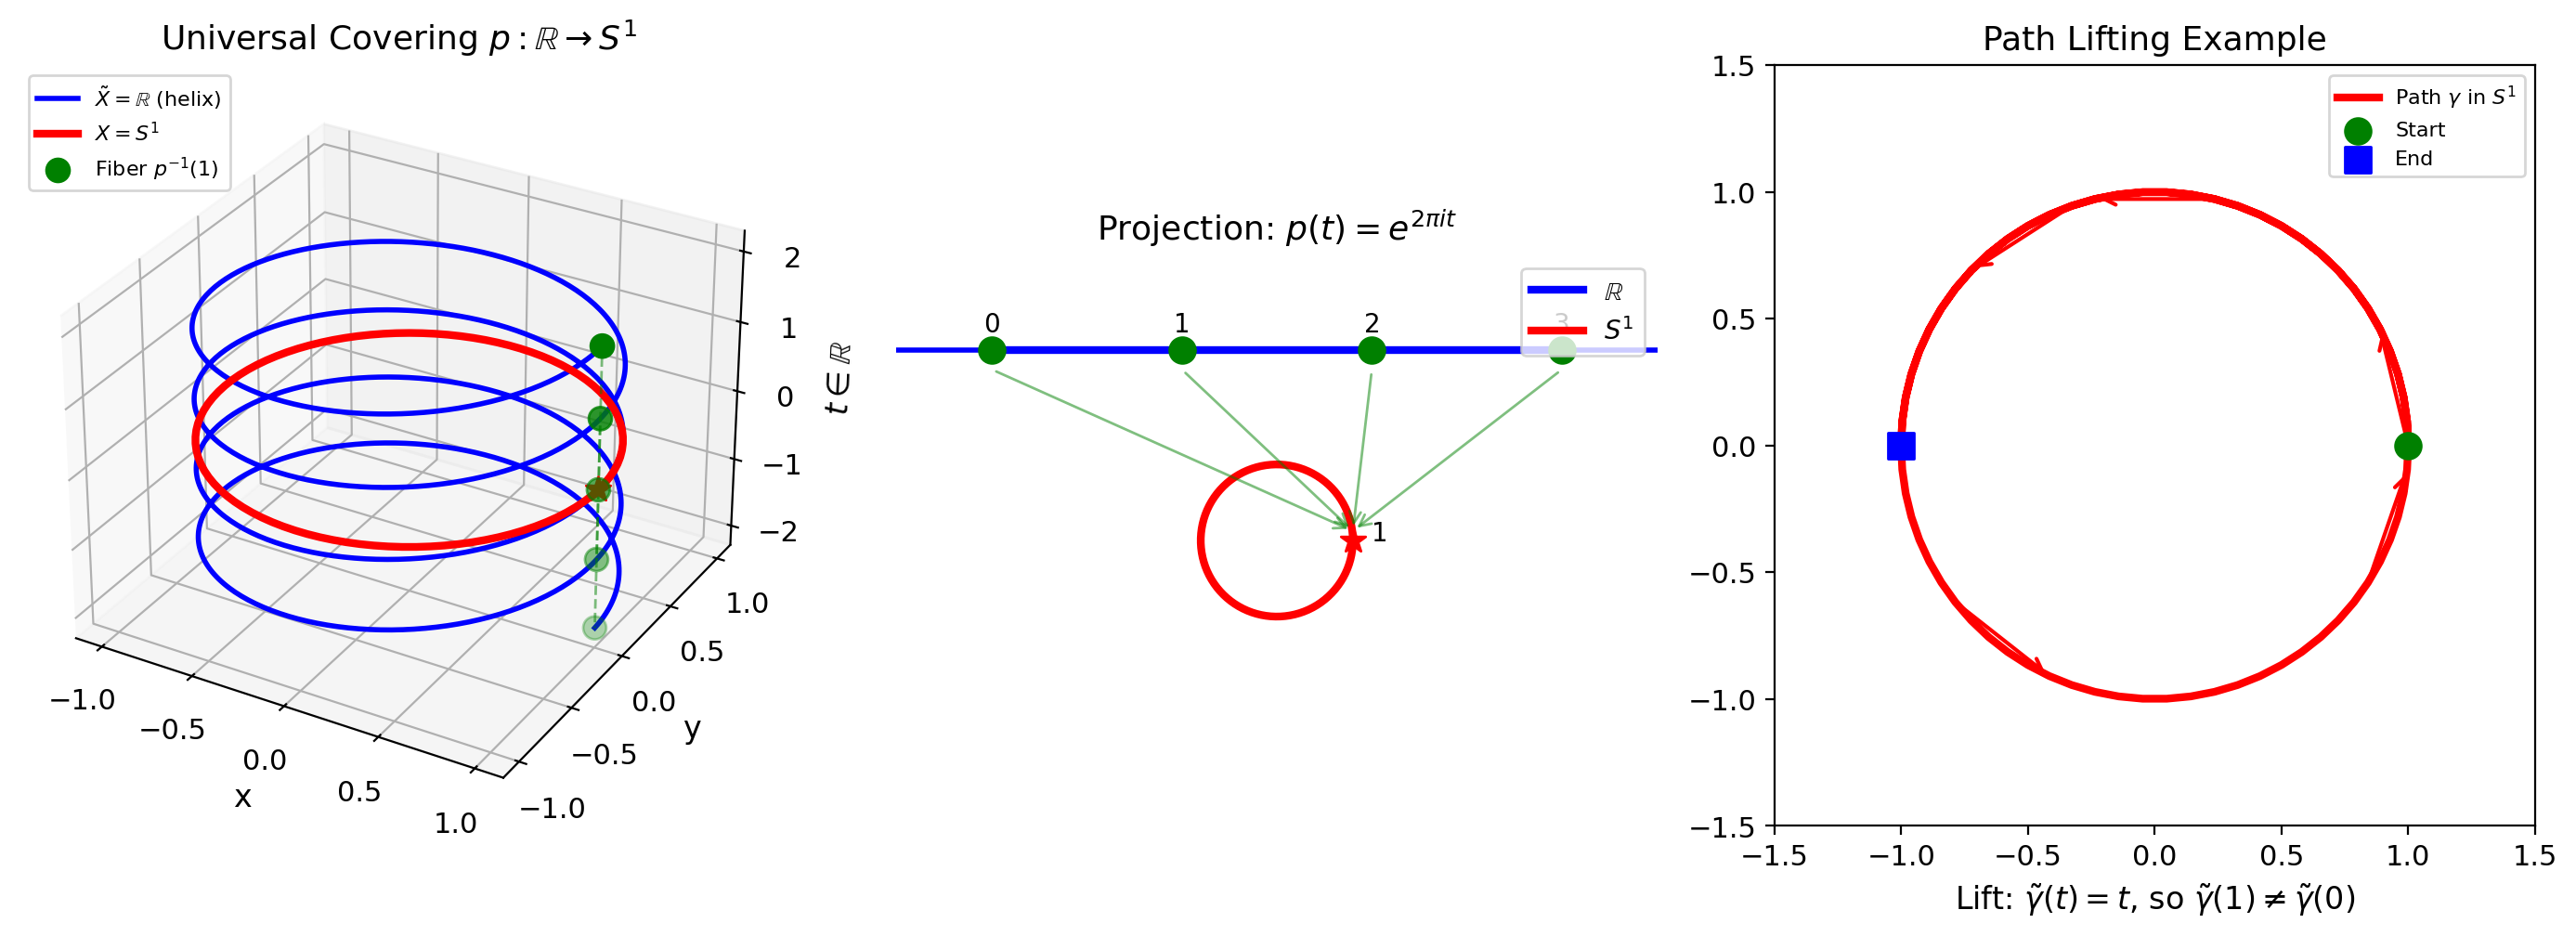

In [2]:
def visualize_real_line_covering_circle():
    """
    Visualize the universal covering map p: R -> S^1
    p(t) = e^(2*pi*i*t) = (cos(2*pi*t), sin(2*pi*t))
    
    We show the helix unwrapping to visualize how the real line
    wraps around the circle infinitely many times.
    """
    fig = plt.figure(figsize=(14, 5))
    
    # Left: 3D helix representation
    ax1 = fig.add_subplot(131, projection='3d')
    
    t = np.linspace(-2, 2, 1000)
    x = np.cos(2 * np.pi * t)
    y = np.sin(2 * np.pi * t)
    z = t
    
    # Plot the helix (representing R)
    ax1.plot(x, y, z, 'b-', linewidth=2, label=r'$\tilde{X} = \mathbb{R}$ (helix)')
    
    # Plot the base circle
    theta_circle = np.linspace(0, 2*np.pi, 100)
    ax1.plot(np.cos(theta_circle), np.sin(theta_circle), 
             np.zeros_like(theta_circle), 'r-', linewidth=3, label=r'$X = S^1$')
    
    # Mark some points in a fiber
    fiber_t = np.array([-2, -1, 0, 1, 2])
    fiber_x = np.cos(2 * np.pi * fiber_t)
    fiber_y = np.sin(2 * np.pi * fiber_t)
    ax1.scatter(fiber_x, fiber_y, fiber_t, c='green', s=80, 
                zorder=5, label=r'Fiber $p^{-1}(1)$')
    
    # Draw vertical projection lines
    for ft in fiber_t:
        ax1.plot([1, 1], [0, 0], [0, ft], 'g--', alpha=0.5, linewidth=1)
    
    ax1.scatter([1], [0], [0], c='red', s=100, marker='*', zorder=6)
    
    ax1.set_xlabel('x')
    ax1.set_ylabel('y')
    ax1.set_zlabel(r'$t \in \mathbb{R}$')
    ax1.set_title(r'Universal Covering $p: \mathbb{R} \to S^1$')
    ax1.legend(loc='upper left', fontsize=8)
    
    # Middle: The projection map
    ax2 = fig.add_subplot(132)
    
    t_proj = np.linspace(0, 3, 300)
    
    # Show the real line
    ax2.axhline(y=1.5, color='blue', linewidth=2)
    ax2.plot(t_proj, np.ones_like(t_proj) * 1.5, 'b-', linewidth=3, label=r'$\mathbb{R}$')
    
    # Mark integer points
    integers = [0, 1, 2, 3]
    ax2.scatter(integers, [1.5]*len(integers), c='green', s=100, zorder=5)
    for i in integers:
        ax2.annotate(f'{i}', (i, 1.6), ha='center', fontsize=10)
    
    # Show the circle below
    theta = np.linspace(0, 2*np.pi, 100)
    circle_x = 1.5 + 0.4 * np.cos(theta)
    circle_y = 0.5 + 0.4 * np.sin(theta)
    ax2.plot(circle_x, circle_y, 'r-', linewidth=3, label=r'$S^1$')
    
    # Mark the base point on circle
    ax2.scatter([1.9], [0.5], c='red', s=100, marker='*', zorder=6)
    ax2.annotate('1', (2.0, 0.5), fontsize=10)
    
    # Draw projection arrows
    for i in integers:
        ax2.annotate('', xy=(1.9, 0.55), xytext=(i, 1.4),
                    arrowprops=dict(arrowstyle='->', color='green', alpha=0.5))
    
    ax2.set_xlim(-0.5, 3.5)
    ax2.set_ylim(0, 2)
    ax2.set_aspect('equal')
    ax2.axis('off')
    ax2.set_title(r'Projection: $p(t) = e^{2\pi i t}$')
    ax2.legend(loc='upper right')
    
    # Right: Path lifting demonstration
    ax3 = fig.add_subplot(133)
    
    # Draw base space (circle)
    theta = np.linspace(0, 2*np.pi, 100)
    ax3.plot(np.cos(theta), np.sin(theta), 'k-', linewidth=1, alpha=0.3)
    
    # Draw a path on the circle (going around 1.5 times)
    t_path = np.linspace(0, 1.5, 100)
    path_x = np.cos(2 * np.pi * t_path)
    path_y = np.sin(2 * np.pi * t_path)
    ax3.plot(path_x, path_y, 'r-', linewidth=3, label=r'Path $\gamma$ in $S^1$')
    
    # Mark start and end
    ax3.scatter([1], [0], c='green', s=100, zorder=5, label='Start')
    ax3.scatter([path_x[-1]], [path_y[-1]], c='blue', s=100, marker='s', zorder=5, label='End')
    
    # Add arrows to show direction
    for i in range(0, len(t_path)-10, 20):
        dx = path_x[i+5] - path_x[i]
        dy = path_y[i+5] - path_y[i]
        ax3.annotate('', xy=(path_x[i+5], path_y[i+5]), xytext=(path_x[i], path_y[i]),
                    arrowprops=dict(arrowstyle='->', color='red', lw=1.5))
    
    ax3.set_xlim(-1.5, 1.5)
    ax3.set_ylim(-1.5, 1.5)
    ax3.set_aspect('equal')
    ax3.set_title('Path Lifting Example')
    ax3.legend(loc='upper right', fontsize=8)
    ax3.set_xlabel(r'Lift: $\tilde{\gamma}(t) = t$, so $\tilde{\gamma}(1) \neq \tilde{\gamma}(0)$')
    
    plt.tight_layout()
    return fig

fig1 = visualize_real_line_covering_circle()
plt.show()

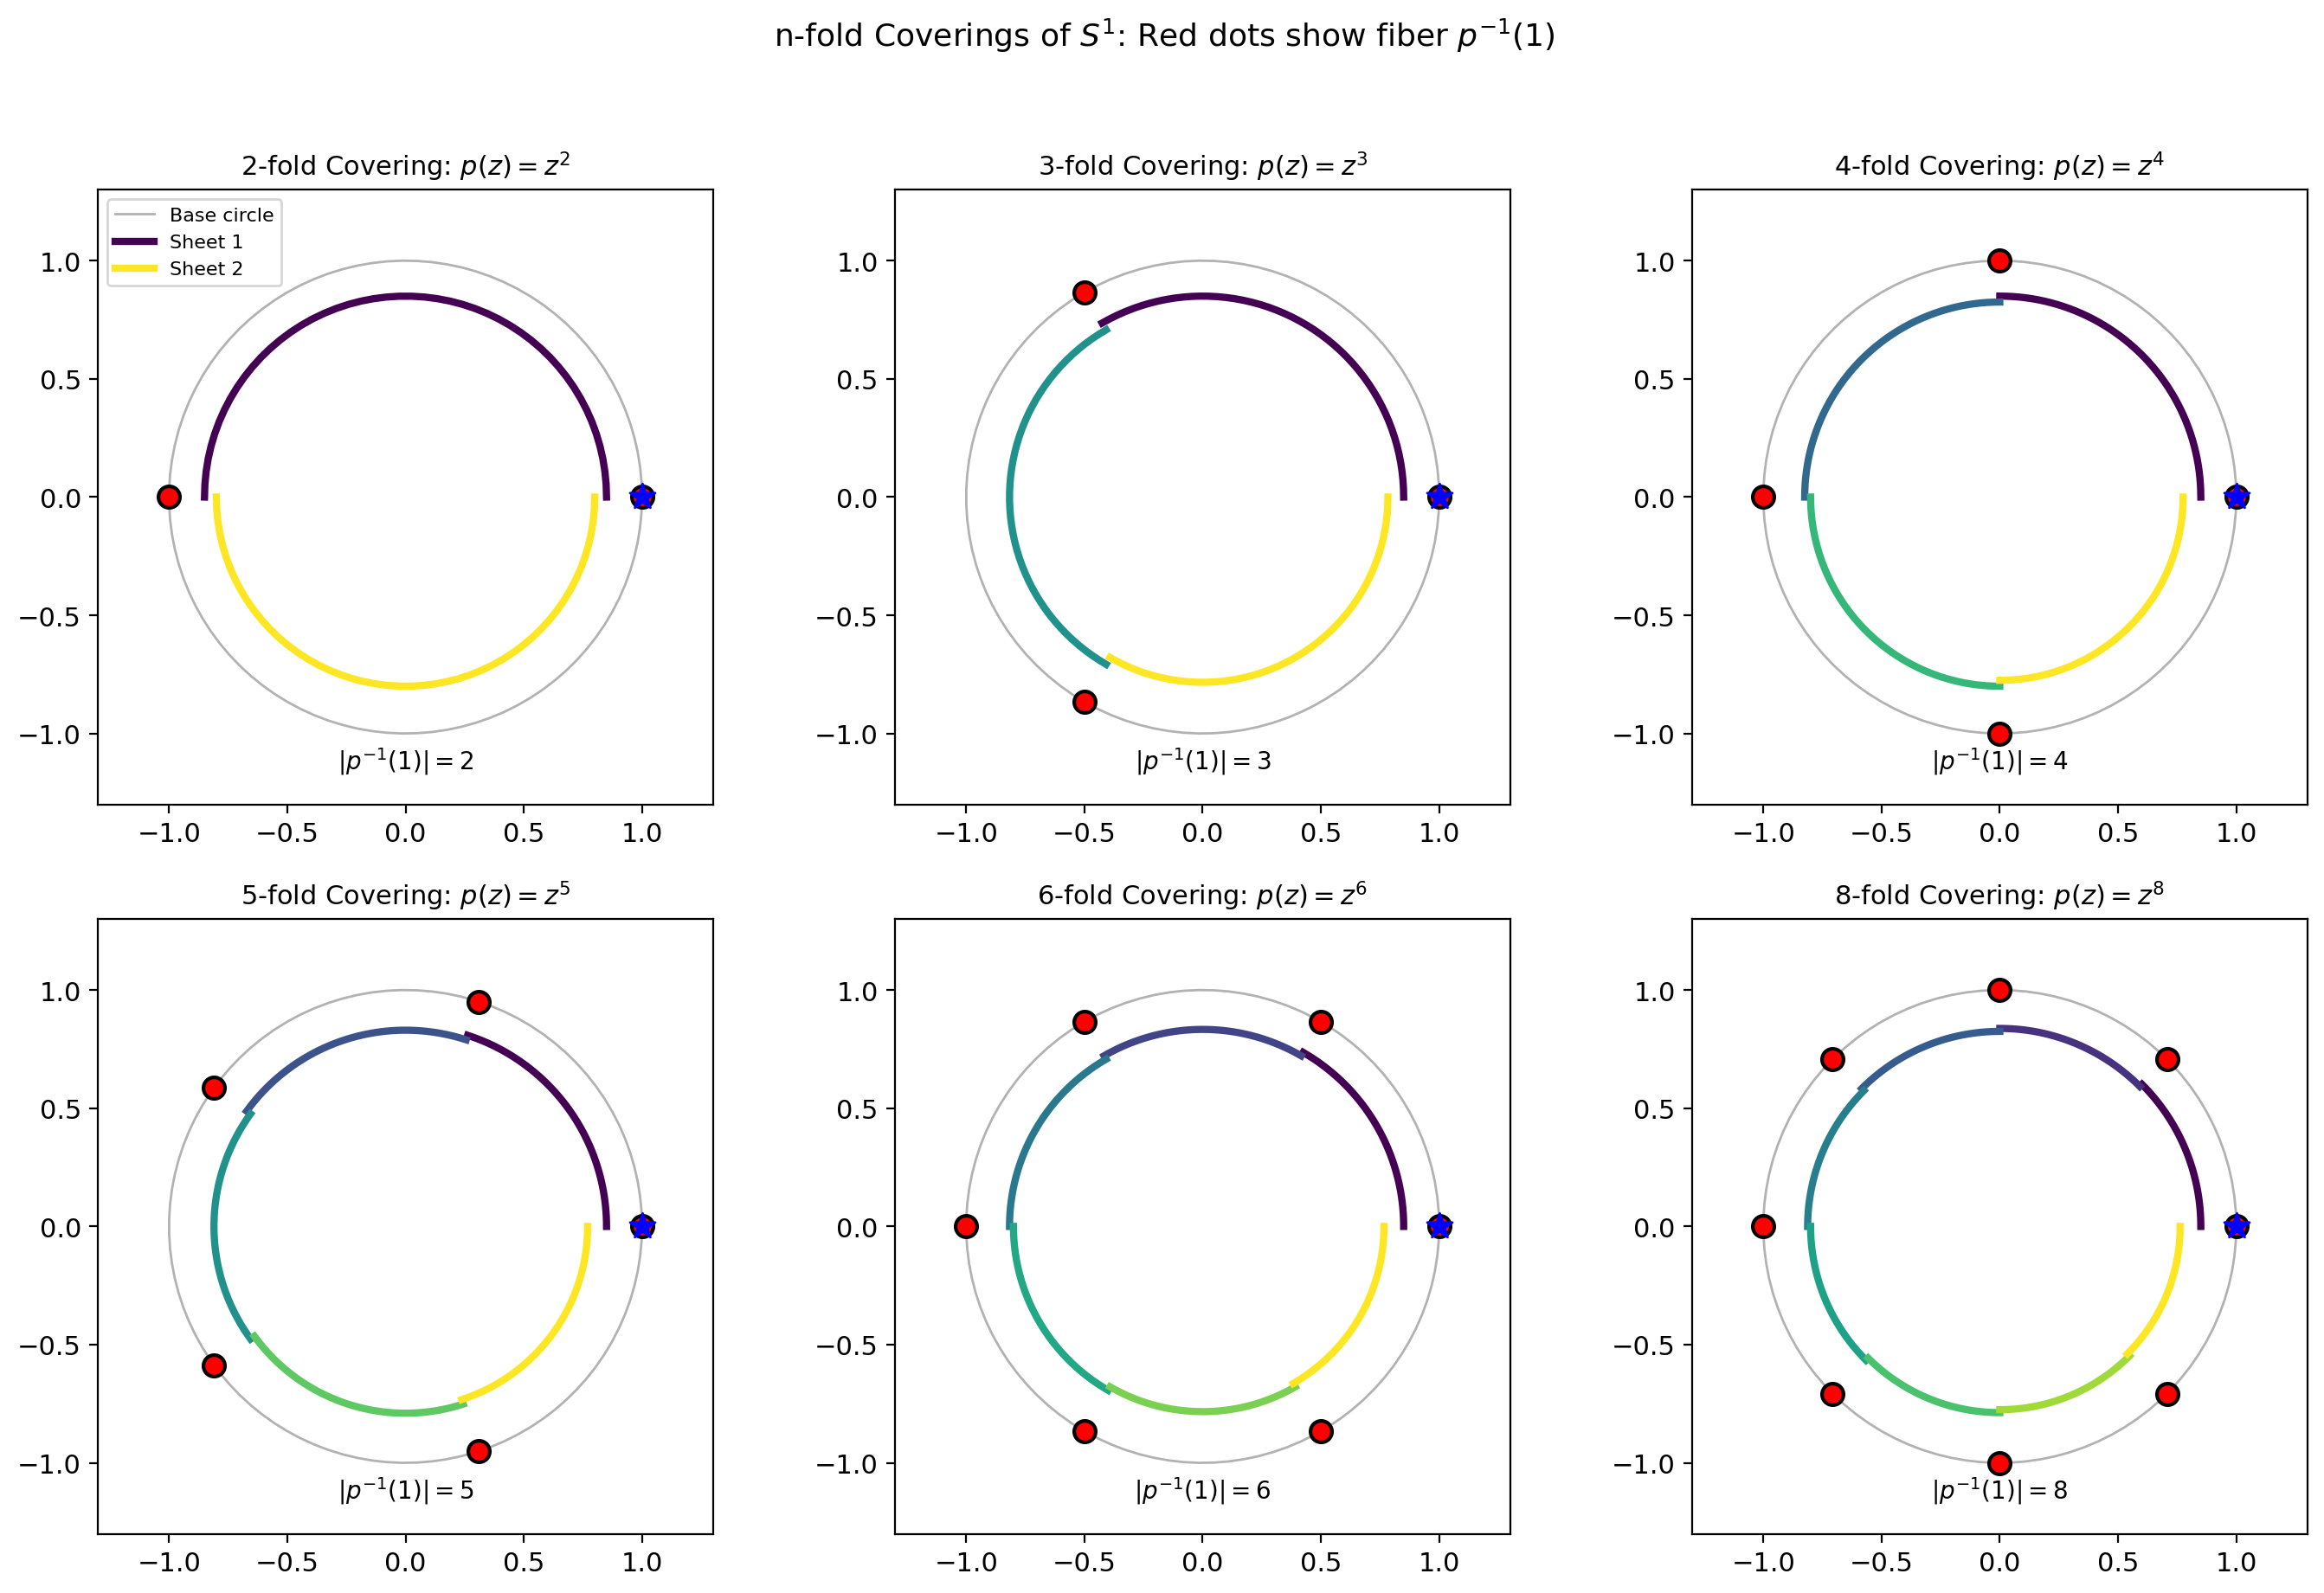

In [3]:
def visualize_n_fold_covering():
    """
    Visualize n-fold coverings of the circle: p_n(z) = z^n
    
    Shows how the circle wraps around itself n times.
    """
    fig, axes = plt.subplots(2, 3, figsize=(14, 9))
    
    n_values = [2, 3, 4, 5, 6, 8]
    
    for idx, n in enumerate(n_values):
        ax = axes[idx // 3, idx % 3]
        
        # Draw the base circle
        theta = np.linspace(0, 2*np.pi, 100)
        ax.plot(np.cos(theta), np.sin(theta), 'k-', linewidth=1, alpha=0.3, label='Base circle')
        
        # Draw the covering map
        # Points on covering circle at angle phi map to angle n*phi on base
        colors = cm.viridis(np.linspace(0, 1, n))
        
        for k in range(n):
            # Each "sheet" corresponds to angles [2*pi*k/n, 2*pi*(k+1)/n]
            phi_start = 2 * np.pi * k / n
            phi_end = 2 * np.pi * (k + 1) / n
            phi = np.linspace(phi_start, phi_end, 50)
            
            # The image covers the full circle
            # We draw arcs to show the n-fold nature
            r = 0.85 - 0.1 * k / n  # Slightly different radii for visualization
            ax.plot(r * np.cos(phi), r * np.sin(phi), '-', color=colors[k], 
                   linewidth=3, label=f'Sheet {k+1}' if k < 3 else None)
        
        # Mark preimages of 1 (the point (1,0))
        preimages_theta = 2 * np.pi * np.arange(n) / n
        preimages_x = np.cos(preimages_theta)
        preimages_y = np.sin(preimages_theta)
        ax.scatter(preimages_x, preimages_y, c='red', s=80, zorder=5, 
                  edgecolors='black', linewidths=1.5)
        
        # Mark the image point
        ax.scatter([1], [0], c='blue', s=120, marker='*', zorder=6)
        
        # Annotations
        ax.set_title(f'{n}-fold Covering: $p(z) = z^{n}$', fontsize=11)
        ax.set_xlim(-1.3, 1.3)
        ax.set_ylim(-1.3, 1.3)
        ax.set_aspect('equal')
        
        # Add fiber information
        ax.text(0, -1.15, f'$|p^{{-1}}(1)| = {n}$', ha='center', fontsize=10)
        
        if idx == 0:
            ax.legend(loc='upper left', fontsize=8)
    
    plt.suptitle(r'n-fold Coverings of $S^1$: Red dots show fiber $p^{-1}(1)$', 
                fontsize=13, y=1.02)
    plt.tight_layout()
    return fig

fig2 = visualize_n_fold_covering()
plt.show()

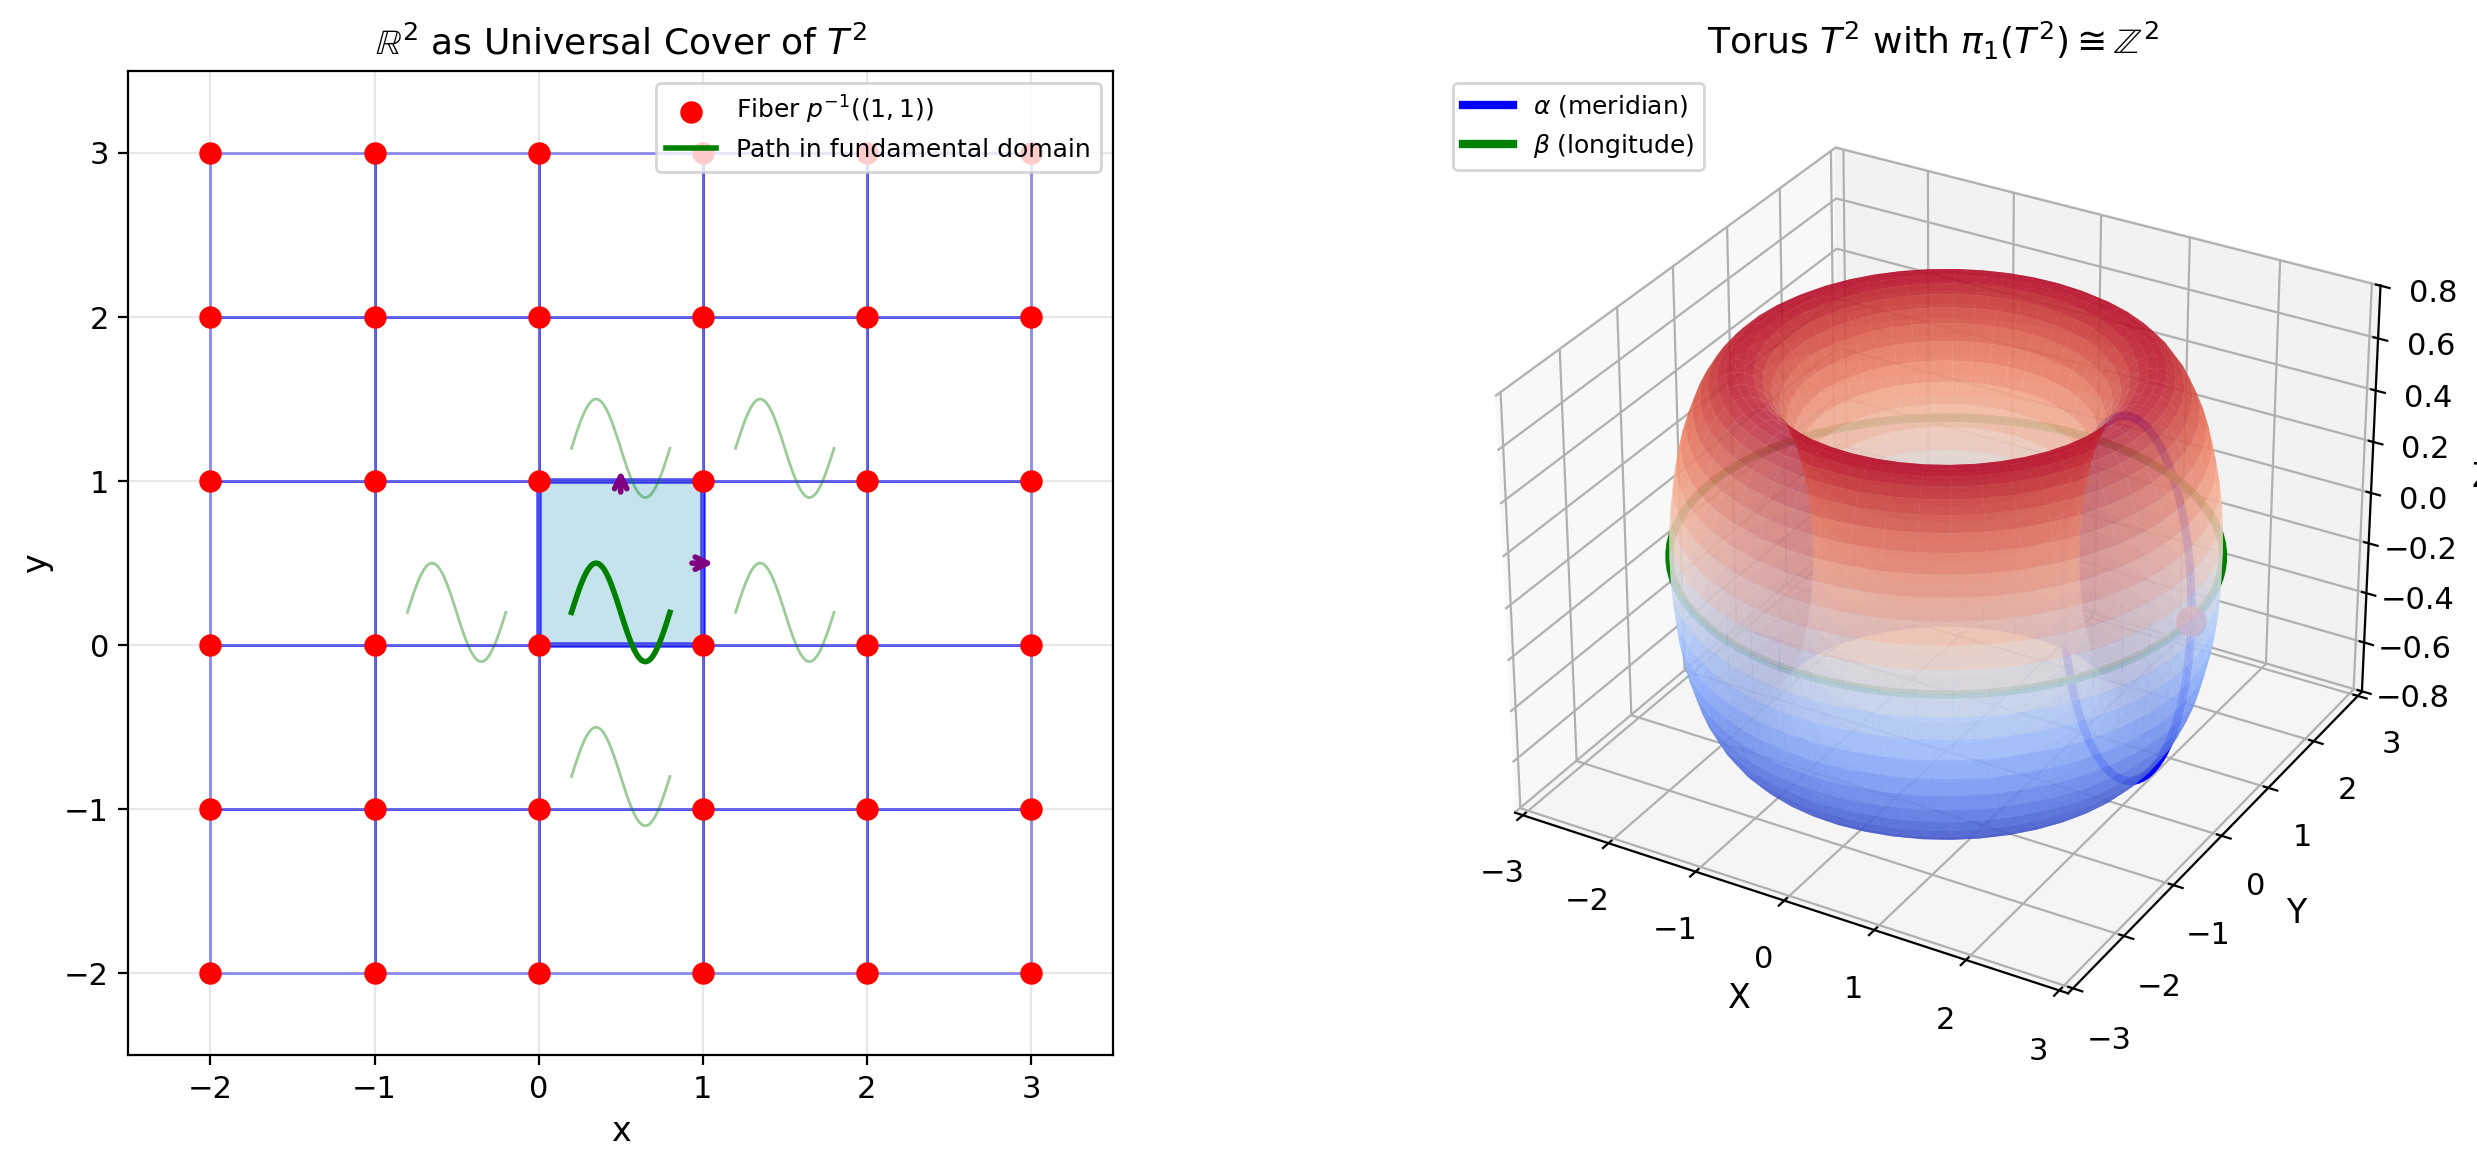

In [4]:
def visualize_torus_covering():
    """
    Visualize the universal covering of the torus: R^2 -> T^2
    
    Shows the fundamental domain and how it tiles the plane,
    with identification giving the torus.
    """
    fig = plt.figure(figsize=(14, 6))
    
    # Left: The plane with fundamental domains
    ax1 = fig.add_subplot(121)
    
    # Draw grid of fundamental domains
    for i in range(-2, 3):
        for j in range(-2, 3):
            # Each unit square is a fundamental domain
            square = plt.Rectangle((i, j), 1, 1, fill=False, 
                                   edgecolor='blue', linewidth=1, alpha=0.5)
            ax1.add_patch(square)
    
    # Highlight the central fundamental domain
    central = plt.Rectangle((0, 0), 1, 1, fill=True, 
                            facecolor='lightblue', edgecolor='blue', 
                            linewidth=2, alpha=0.7)
    ax1.add_patch(central)
    
    # Mark lattice points (preimages of base point)
    lattice_x, lattice_y = np.meshgrid(range(-2, 4), range(-2, 4))
    ax1.scatter(lattice_x, lattice_y, c='red', s=50, zorder=5, 
               label=r'Fiber $p^{-1}((1,1))$')
    
    # Draw a path in the fundamental domain
    t = np.linspace(0, 1, 100)
    path_x = 0.2 + 0.6 * t
    path_y = 0.2 + 0.3 * np.sin(2 * np.pi * t)
    ax1.plot(path_x, path_y, 'g-', linewidth=2, label='Path in fundamental domain')
    
    # Show the same path in adjacent domains
    for (dx, dy) in [(1, 0), (0, 1), (1, 1), (-1, 0), (0, -1)]:
        ax1.plot(path_x + dx, path_y + dy, 'g-', linewidth=1, alpha=0.4)
    
    # Arrows showing identification
    ax1.annotate('', xy=(1.1, 0.5), xytext=(0.9, 0.5),
                arrowprops=dict(arrowstyle='->', color='purple', lw=2))
    ax1.annotate('', xy=(0.5, 1.1), xytext=(0.5, 0.9),
                arrowprops=dict(arrowstyle='->', color='purple', lw=2))
    
    ax1.set_xlim(-2.5, 3.5)
    ax1.set_ylim(-2.5, 3.5)
    ax1.set_aspect('equal')
    ax1.set_xlabel('x')
    ax1.set_ylabel('y')
    ax1.set_title(r'$\mathbb{R}^2$ as Universal Cover of $T^2$')
    ax1.legend(loc='upper right', fontsize=9)
    ax1.grid(True, alpha=0.3)
    
    # Right: 3D torus
    ax2 = fig.add_subplot(122, projection='3d')
    
    # Parametric torus
    R, r = 2, 0.7  # Major and minor radii
    u = np.linspace(0, 2*np.pi, 50)
    v = np.linspace(0, 2*np.pi, 50)
    U, V = np.meshgrid(u, v)
    
    X = (R + r * np.cos(V)) * np.cos(U)
    Y = (R + r * np.cos(V)) * np.sin(U)
    Z = r * np.sin(V)
    
    ax2.plot_surface(X, Y, Z, cmap='coolwarm', alpha=0.7, 
                    linewidth=0, antialiased=True)
    
    # Draw generators of fundamental group
    # Meridian (around the tube)
    u_merid = 0
    v_merid = np.linspace(0, 2*np.pi, 100)
    x_merid = (R + r * np.cos(v_merid)) * np.cos(u_merid)
    y_merid = (R + r * np.cos(v_merid)) * np.sin(u_merid)
    z_merid = r * np.sin(v_merid)
    ax2.plot(x_merid, y_merid, z_merid, 'b-', linewidth=3, label=r'$\alpha$ (meridian)')
    
    # Longitude (around the hole)
    u_long = np.linspace(0, 2*np.pi, 100)
    v_long = 0
    x_long = (R + r * np.cos(v_long)) * np.cos(u_long)
    y_long = (R + r * np.cos(v_long)) * np.sin(u_long)
    z_long = r * np.sin(v_long) * np.ones_like(u_long)
    ax2.plot(x_long, y_long, z_long, 'g-', linewidth=3, label=r'$\beta$ (longitude)')
    
    # Mark base point
    base_x = (R + r) * np.cos(0)
    base_y = (R + r) * np.sin(0)
    base_z = 0
    ax2.scatter([base_x], [base_y], [base_z], c='red', s=100, zorder=5)
    
    ax2.set_xlabel('X')
    ax2.set_ylabel('Y')
    ax2.set_zlabel('Z')
    ax2.set_title(r'Torus $T^2$ with $\pi_1(T^2) \cong \mathbb{Z}^2$')
    ax2.legend(loc='upper left', fontsize=9)
    
    plt.tight_layout()
    return fig

fig3 = visualize_torus_covering()
plt.show()

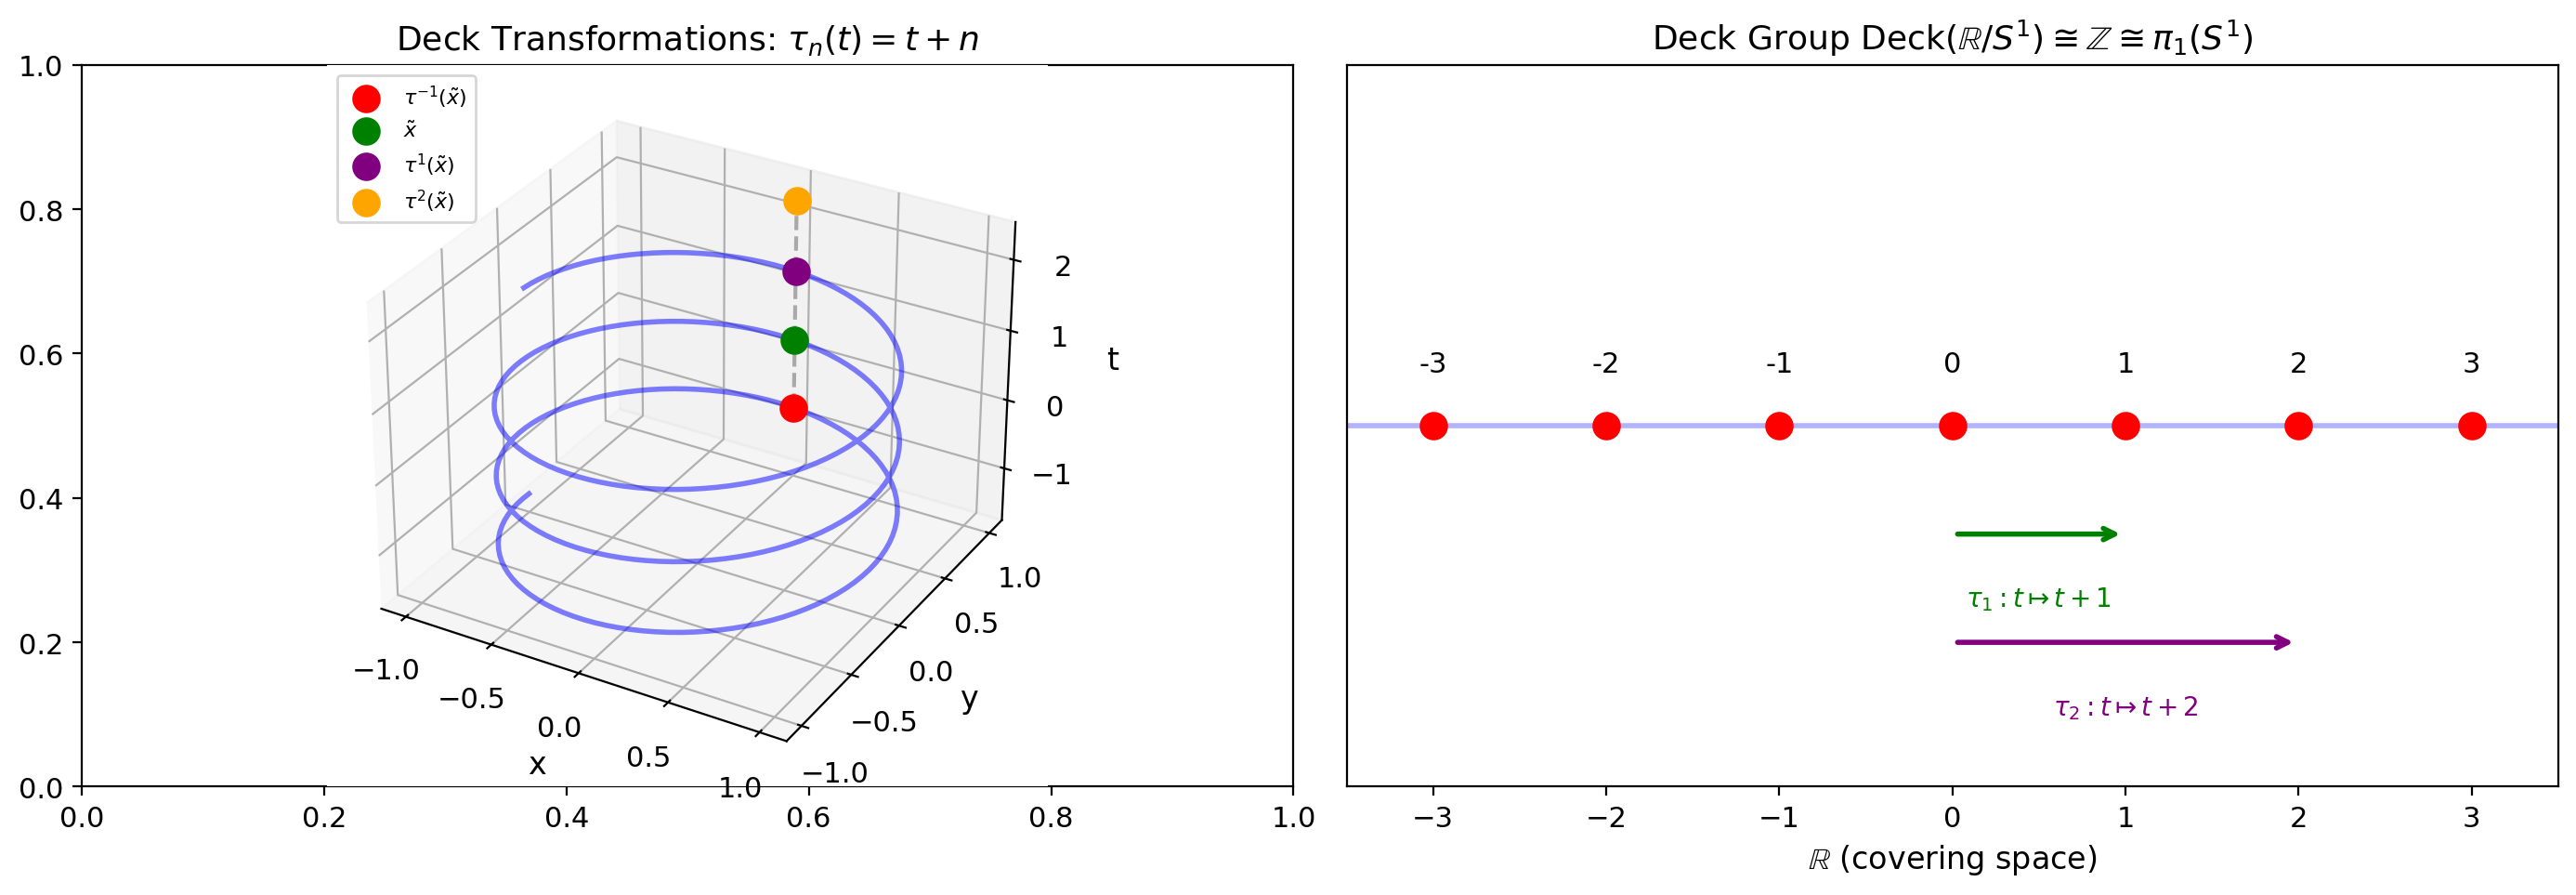

In [5]:
def visualize_deck_transformations():
    """
    Visualize deck transformations for the universal covering of S^1.
    
    The deck transformation group is Z, acting by translation on R.
    """
    fig, axes = plt.subplots(1, 2, figsize=(14, 5))
    
    # Left: Deck transformations on the helix
    ax1 = fig.add_subplot(121, projection='3d')
    
    t = np.linspace(-1.5, 1.5, 300)
    x = np.cos(2 * np.pi * t)
    y = np.sin(2 * np.pi * t)
    z = t
    
    ax1.plot(x, y, z, 'b-', linewidth=2, alpha=0.5)
    
    # Mark a point and its images under deck transformations
    t0 = 0.25
    point_x = np.cos(2 * np.pi * t0)
    point_y = np.sin(2 * np.pi * t0)
    
    colors = ['red', 'green', 'purple', 'orange']
    for k, n in enumerate([-1, 0, 1, 2]):
        tz = t0 + n
        ax1.scatter([point_x], [point_y], [tz], c=colors[k], s=100, 
                   label=f'$\\tau^{{{n}}}(\\tilde{{x}})$' if n != 0 else r'$\tilde{x}$',
                   zorder=5)
    
    # Draw translation arrows
    for n in range(-1, 2):
        ax1.plot([point_x, point_x], [point_y, point_y], 
                [t0 + n, t0 + n + 1], 'k--', alpha=0.3)
    
    ax1.set_xlabel('x')
    ax1.set_ylabel('y')
    ax1.set_zlabel('t')
    ax1.set_title(r'Deck Transformations: $\tau_n(t) = t + n$')
    ax1.legend(loc='upper left', fontsize=8)
    
    # Right: Action on fiber
    ax2 = axes[1]
    
    # Draw the real line
    ax2.axhline(y=0, color='blue', linewidth=2, alpha=0.3)
    ax2.set_xlim(-3.5, 3.5)
    ax2.set_ylim(-1, 1)
    
    # Mark integer points (fiber over 1)
    integers = np.arange(-3, 4)
    ax2.scatter(integers, np.zeros_like(integers), c='red', s=100, zorder=5)
    
    for i in integers:
        ax2.annotate(f'{i}', (i, 0.15), ha='center', fontsize=11)
    
    # Show deck transformation action
    ax2.annotate('', xy=(1, -0.3), xytext=(0, -0.3),
                arrowprops=dict(arrowstyle='->', color='green', lw=2))
    ax2.text(0.5, -0.5, r'$\tau_1: t \mapsto t+1$', ha='center', fontsize=10, color='green')
    
    ax2.annotate('', xy=(2, -0.6), xytext=(0, -0.6),
                arrowprops=dict(arrowstyle='->', color='purple', lw=2))
    ax2.text(1, -0.8, r'$\tau_2: t \mapsto t+2$', ha='center', fontsize=10, color='purple')
    
    ax2.set_title(r'Deck Group $\mathrm{Deck}(\mathbb{R}/S^1) \cong \mathbb{Z} \cong \pi_1(S^1)$')
    ax2.set_xlabel(r'$\mathbb{R}$ (covering space)')
    ax2.set_yticks([])
    
    plt.tight_layout()
    return fig

fig4 = visualize_deck_transformations()
plt.show()

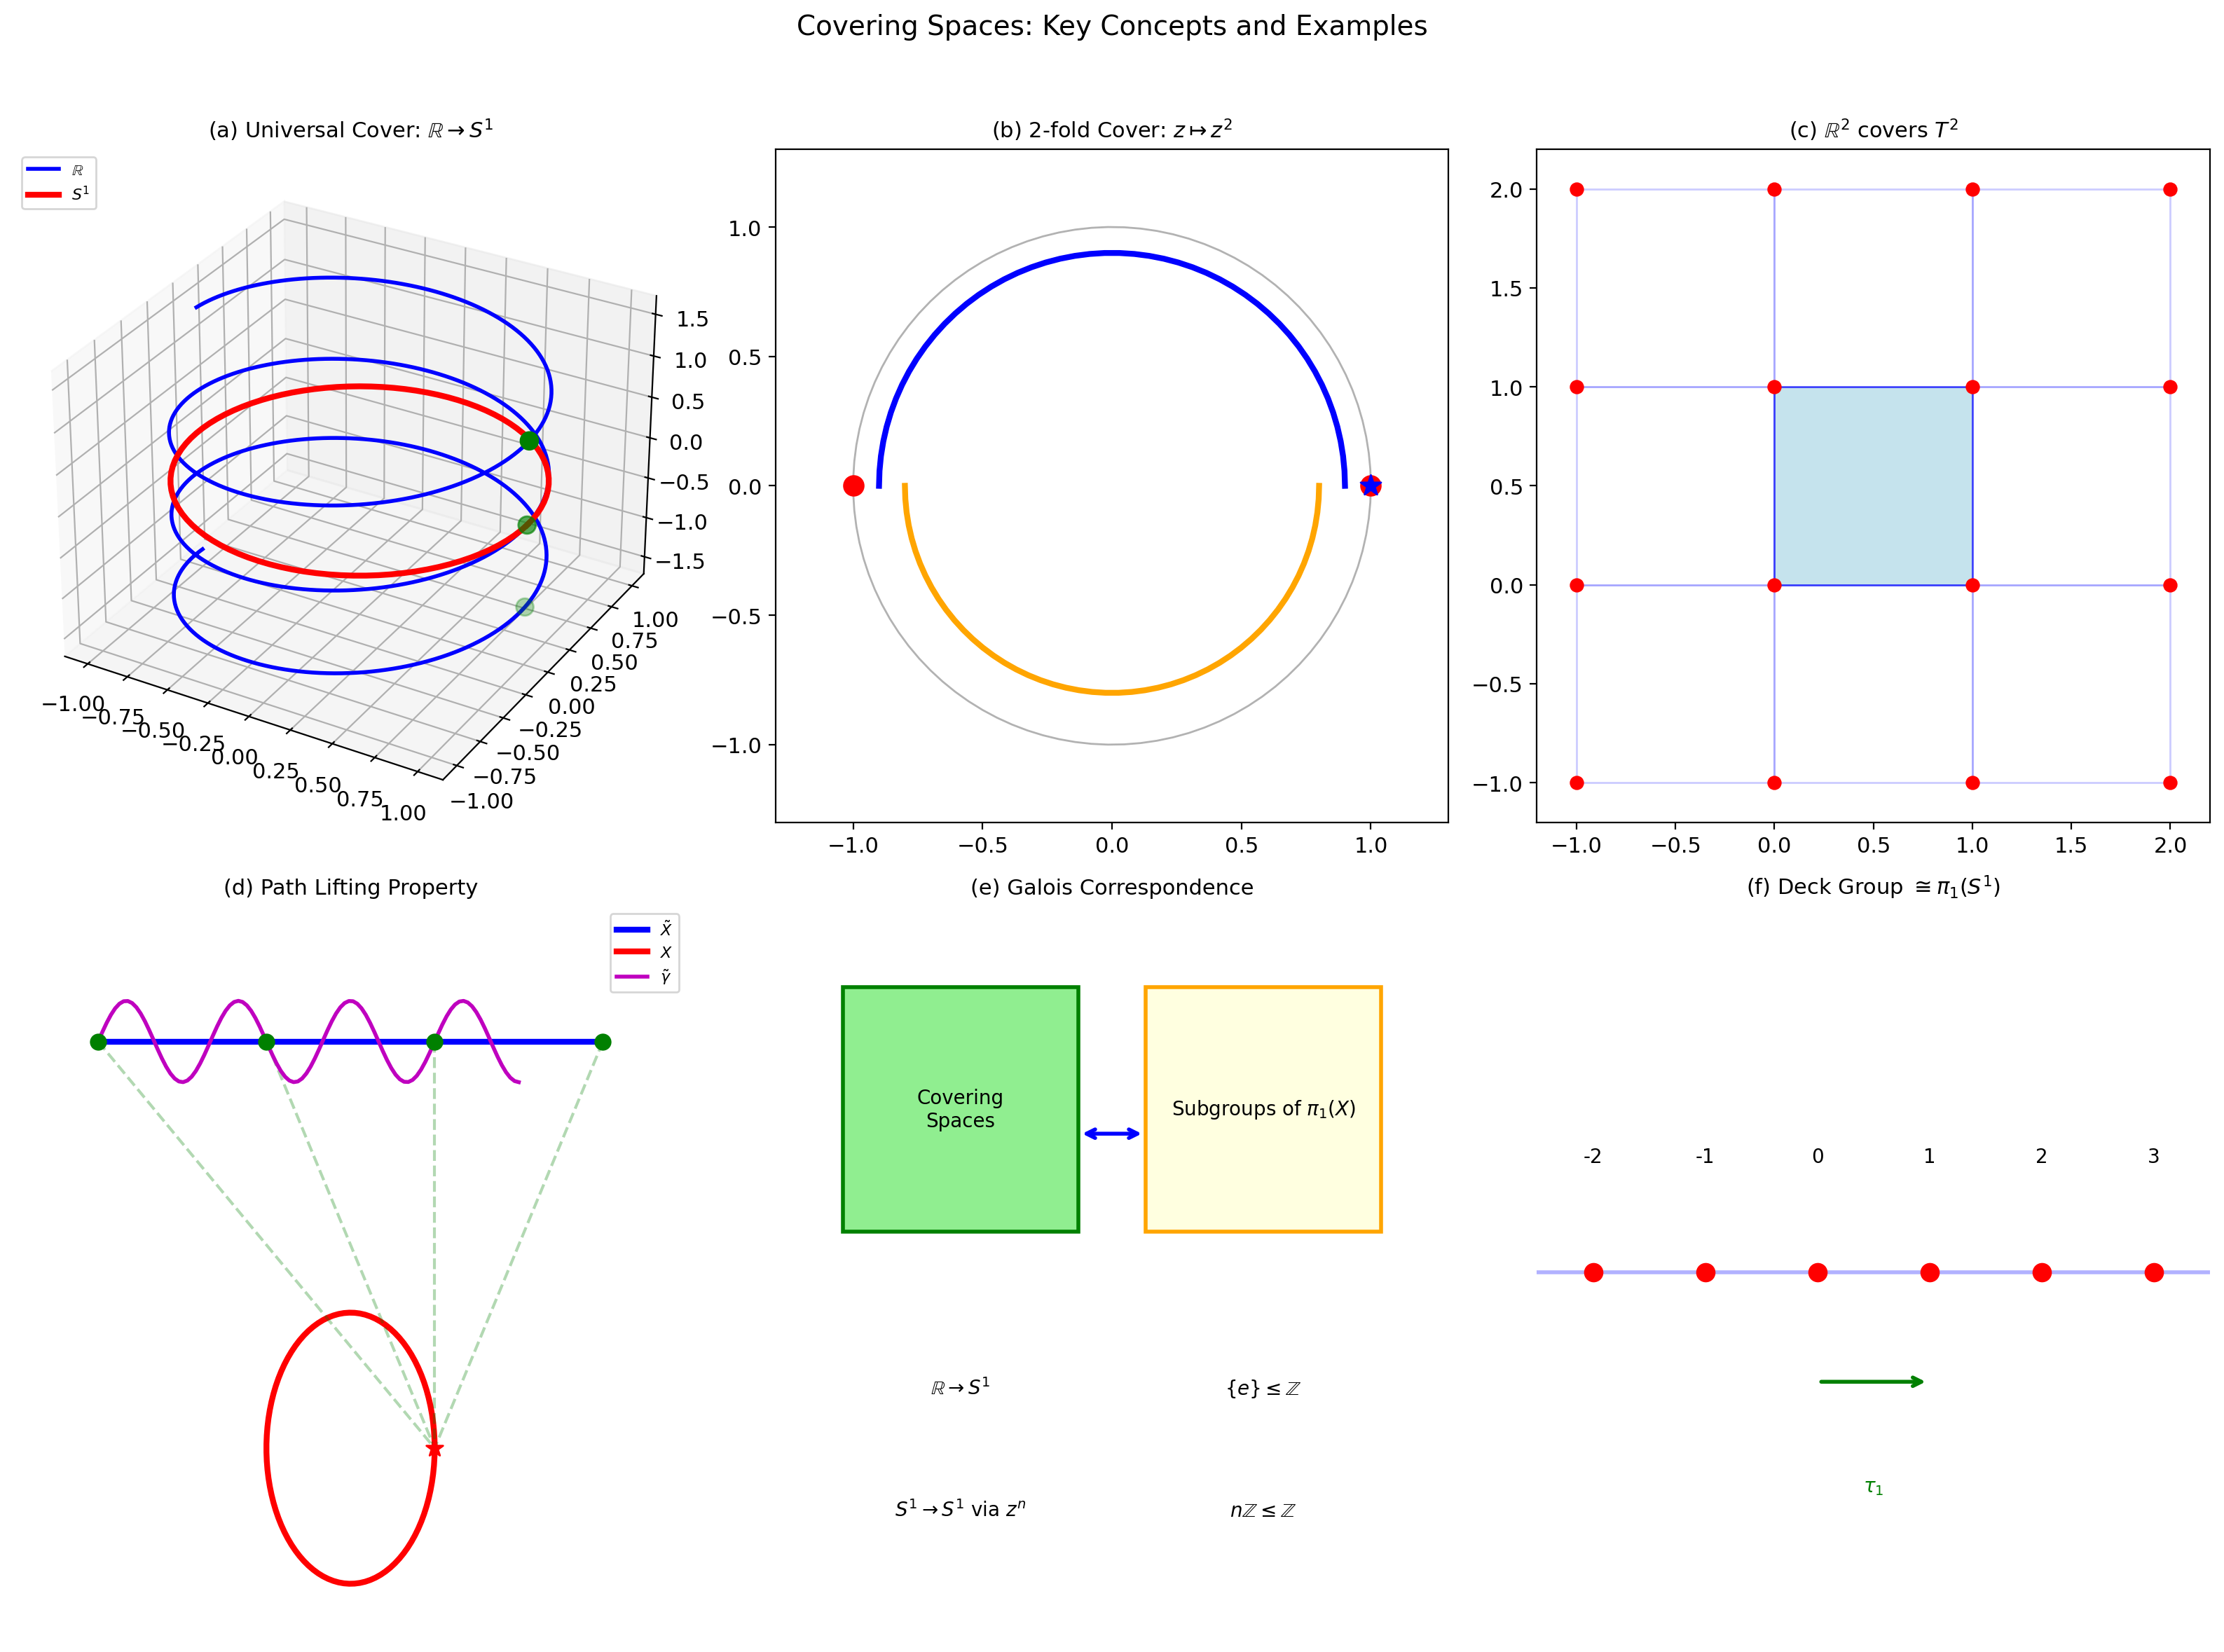

Figure saved as 'plot.png'


In [6]:
def create_comprehensive_figure():
    """
    Create a comprehensive summary figure showing key concepts
    of covering space theory.
    """
    fig = plt.figure(figsize=(16, 12))
    
    # 1. Universal covering R -> S^1 (3D helix)
    ax1 = fig.add_subplot(231, projection='3d')
    
    t = np.linspace(-1.5, 1.5, 500)
    x = np.cos(2 * np.pi * t)
    y = np.sin(2 * np.pi * t)
    z = t
    
    ax1.plot(x, y, z, 'b-', linewidth=2, label=r'$\mathbb{R}$')
    
    theta_circle = np.linspace(0, 2*np.pi, 100)
    ax1.plot(np.cos(theta_circle), np.sin(theta_circle), 
             np.zeros_like(theta_circle), 'r-', linewidth=3, label=r'$S^1$')
    
    # Fiber points
    fiber_t = np.array([-1, 0, 1])
    ax1.scatter(np.ones(3), np.zeros(3), fiber_t, c='green', s=80, zorder=5)
    
    ax1.set_title(r'(a) Universal Cover: $\mathbb{R} \to S^1$', fontsize=11)
    ax1.legend(loc='upper left', fontsize=8)
    
    # 2. Double covering of circle
    ax2 = fig.add_subplot(232)
    
    theta = np.linspace(0, 2*np.pi, 100)
    ax2.plot(np.cos(theta), np.sin(theta), 'k-', linewidth=1, alpha=0.3)
    
    # Two sheets
    for k in range(2):
        phi_start = np.pi * k
        phi_end = np.pi * (k + 1)
        phi = np.linspace(phi_start, phi_end, 50)
        r = 0.9 - 0.1 * k
        color = 'blue' if k == 0 else 'orange'
        ax2.plot(r * np.cos(phi), r * np.sin(phi), '-', color=color, linewidth=3)
    
    # Preimages of 1
    ax2.scatter([1, -1], [0, 0], c='red', s=100, zorder=5)
    ax2.scatter([1], [0], c='blue', s=120, marker='*', zorder=6)
    
    ax2.set_xlim(-1.3, 1.3)
    ax2.set_ylim(-1.3, 1.3)
    ax2.set_aspect('equal')
    ax2.set_title(r'(b) 2-fold Cover: $z \mapsto z^2$', fontsize=11)
    
    # 3. Fundamental domain of torus
    ax3 = fig.add_subplot(233)
    
    for i in range(-1, 2):
        for j in range(-1, 2):
            alpha = 0.7 if (i == 0 and j == 0) else 0.2
            color = 'lightblue' if (i == 0 and j == 0) else 'white'
            square = plt.Rectangle((i, j), 1, 1, fill=True, 
                                   facecolor=color, edgecolor='blue', 
                                   linewidth=1, alpha=alpha)
            ax3.add_patch(square)
    
    lattice_x, lattice_y = np.meshgrid(range(-1, 3), range(-1, 3))
    ax3.scatter(lattice_x, lattice_y, c='red', s=40, zorder=5)
    
    ax3.set_xlim(-1.2, 2.2)
    ax3.set_ylim(-1.2, 2.2)
    ax3.set_aspect('equal')
    ax3.set_title(r'(c) $\mathbb{R}^2$ covers $T^2$', fontsize=11)
    
    # 4. Path lifting diagram
    ax4 = fig.add_subplot(234)
    
    # Covering space (line segment)
    ax4.plot([0, 3], [2, 2], 'b-', linewidth=3, label=r'$\tilde{X}$')
    ax4.scatter([0, 1, 2, 3], [2, 2, 2, 2], c='green', s=60, zorder=5)
    
    # Base space (circle schematic)
    theta = np.linspace(0, 2*np.pi, 100)
    ax4.plot(1.5 + 0.5*np.cos(theta), 0.5 + 0.5*np.sin(theta), 'r-', linewidth=3, label=r'$X$')
    
    # Projection lines
    for x in [0, 1, 2, 3]:
        ax4.plot([x, 1.5 + 0.5], [2, 0.5], 'g--', alpha=0.3)
    
    # Lifted path
    t_lift = np.linspace(0, 2.5, 100)
    ax4.plot(t_lift, 2 + 0.15*np.sin(3*np.pi*t_lift), 'm-', linewidth=2, label=r'$\tilde{\gamma}$')
    
    ax4.scatter([2.0], [0.5], c='red', s=80, marker='*', zorder=6)
    
    ax4.set_xlim(-0.5, 3.5)
    ax4.set_ylim(-0.2, 2.5)
    ax4.set_title('(d) Path Lifting Property', fontsize=11)
    ax4.legend(loc='upper right', fontsize=8)
    ax4.axis('off')
    
    # 5. Correspondence theorem diagram
    ax5 = fig.add_subplot(235)
    
    # Draw boxes
    box1 = plt.Rectangle((0.1, 0.6), 0.35, 0.3, fill=True, 
                         facecolor='lightgreen', edgecolor='green', linewidth=2)
    box2 = plt.Rectangle((0.55, 0.6), 0.35, 0.3, fill=True, 
                         facecolor='lightyellow', edgecolor='orange', linewidth=2)
    ax5.add_patch(box1)
    ax5.add_patch(box2)
    
    ax5.text(0.275, 0.75, 'Covering\nSpaces', ha='center', va='center', fontsize=10)
    ax5.text(0.725, 0.75, r'Subgroups of $\pi_1(X)$', ha='center', va='center', fontsize=10)
    
    # Arrows
    ax5.annotate('', xy=(0.55, 0.72), xytext=(0.45, 0.72),
                arrowprops=dict(arrowstyle='<->', color='blue', lw=2))
    
    # Examples below (using simple arrow notation supported by matplotlib)
    ax5.text(0.275, 0.4, r'$\mathbb{R} \to S^1$', ha='center', fontsize=10)
    ax5.text(0.725, 0.4, r'$\{e\} \leq \mathbb{Z}$', ha='center', fontsize=10)
    
    ax5.text(0.275, 0.25, r'$S^1 \to S^1$ via $z^n$', ha='center', fontsize=10)
    ax5.text(0.725, 0.25, r'$n\mathbb{Z} \leq \mathbb{Z}$', ha='center', fontsize=10)
    
    ax5.set_xlim(0, 1)
    ax5.set_ylim(0.1, 1)
    ax5.set_title('(e) Galois Correspondence', fontsize=11)
    ax5.axis('off')
    
    # 6. Deck transformation visualization
    ax6 = fig.add_subplot(236)
    
    ax6.axhline(y=0.5, color='blue', linewidth=2, alpha=0.3)
    
    integers = np.arange(-2, 4)
    ax6.scatter(integers, [0.5]*len(integers), c='red', s=80, zorder=5)
    
    for i in integers:
        ax6.annotate(f'{i}', (i, 0.65), ha='center', fontsize=10)
    
    # Deck transformation arrows
    ax6.annotate('', xy=(1, 0.35), xytext=(0, 0.35),
                arrowprops=dict(arrowstyle='->', color='green', lw=2))
    ax6.text(0.5, 0.2, r'$\tau_1$', ha='center', fontsize=10, color='green')
    
    ax6.set_xlim(-2.5, 3.5)
    ax6.set_ylim(0, 1)
    ax6.set_title(r'(f) Deck Group $\cong \pi_1(S^1)$', fontsize=11)
    ax6.axis('off')
    
    plt.suptitle('Covering Spaces: Key Concepts and Examples', fontsize=14, y=0.98)
    plt.tight_layout(rect=[0, 0, 1, 0.96])
    
    return fig

# Create and save the comprehensive figure
fig_final = create_comprehensive_figure()
fig_final.savefig('covering_spaces_analysis.png', dpi=150, bbox_inches='tight', facecolor='white')
plt.show()

print("Figure saved as 'plot.png'")

## 7. Summary and Key Results

### Main Theorems

1. **Existence of Universal Cover:** For "nice" spaces $X$ (path-connected, locally path-connected, semi-locally simply connected), there exists a simply connected covering space $\tilde{X}$, unique up to isomorphism.

2. **Classification Theorem:** Covering spaces of $X$ are classified by conjugacy classes of subgroups of $\pi_1(X)$.

3. **Degree-Index Formula:** $\deg(p) = [\pi_1(X) : p_*(\pi_1(\tilde{X}))]$

4. **Deck Transformation Theorem:** For normal coverings, $\text{Deck}(\tilde{X}/X) \cong \pi_1(X)/p_*(\pi_1(\tilde{X}))$

### Applications

- **Computing fundamental groups:** If $\tilde{X}$ is simply connected and we can identify deck transformations, then $\pi_1(X) \cong \text{Deck}(\tilde{X}/X)$
- **Proving topological results:** Many theorems about covering spaces translate to group-theoretic statements
- **Riemann surfaces:** The theory of covering spaces underlies the theory of Riemann surfaces and analytic continuation
- **Galois theory analogy:** The correspondence between coverings and subgroups parallels the Galois correspondence in field theory